# Online Retail Transcactions Dataset

Datset from Kaggle database: https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset/data?select=Online+Retail.csv


- Analyzing Online Retail Transactions: Understanding Customer Behavior and Trends

### About Dataset

The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.



### Import Libraries

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib as mpl
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
print(plt.style.available)
mpl.style.use(['ggplot'])
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [125]:
from scipy import stats 

### Import the dataset


In [126]:
#vehicle_df = pd.read_csv('vehicles.csv')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [60]:
%config Completer.use_jedi = False

In [61]:
os.listdir()

['online_transactions.ipynb',
 'Online Retail.csv',
 '.DS_Store',
 'Online Retail.csv.zip',
 'vehicles.csv.zip',
 'vehicles.csv']

In [127]:
df = pd.read_csv('Online Retail.csv')

In [128]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [129]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [130]:
for column_name, dtype in df.dtypes.items():
    if dtype == 'object':
        unique_values = df[column_name].unique()
        print(f"Column: {column_name}, Data Type: {dtype}, Unique Values: {unique_values}")

Column: InvoiceNo, Data Type: object, Unique Values: ['536365' '536366' '536367' ... '581585' '581586' '581587']
Column: StockCode, Data Type: object, Unique Values: ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Column: Description, Data Type: object, Unique Values: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Column: InvoiceDate, Data Type: object, Unique Values: ['2010-12-01 08:26:00' '2010-12-01 08:28:00' '2010-12-01 08:34:00' ...
 '2011-12-09 12:31:00' '2011-12-09 12:49:00' '2011-12-09 12:50:00']
Column: Country, Data Type: object, Unique Values: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' '

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


- There are 541909 imported values - raws
- 8 features - 8 columns

In [132]:
#Convert InvoiceDate from object to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB
None


In [133]:
# Change the quantity ad price to absolute valute to make the data clearer
df['Quantity'] = df['Quantity'].abs()
df['UnitPrice'] = df['UnitPrice'].abs()


### Data

* Invoice No: A code used to identify the invoice number 
* StockCode: A code used to identify the product that was purchased
* Description: A brief description of the product that was purchased
* Quantity: The quantity of the product that was purchased
InvoiceDate: The date and time that the purchase was made
* UnitPrice: The price of one unit of the product that was purchased
* CustomerID: The unique identifier for the customer who made the purchase
* Country: The country where the customer who made the purchase is located

In [134]:
df.duplicated().sum()

5268

In [135]:
#Drop duplicates
df = df.drop_duplicates()

In [136]:
df.duplicated().sum()

0

In [137]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

Find unique and missing values

In [138]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output


,variable,dtype,count,unique,missing
0,InvoiceNo,object,536641,25900,0
1,StockCode,object,536641,4070,0
2,Description,object,536641,4224,1454
3,Quantity,int64,536641,487,0
4,InvoiceDate,datetime64[ns],536641,23260,0
5,UnitPrice,float64,536641,1629,0
6,CustomerID,int64,536641,4372,0
7,Country,object,536641,38,0


* Th current dataset has 1454 missing data in Description column, and 

In [139]:
# Store the stock code from missing value
list_stockcode_from_missing = []
for item in df[df['Description'].isnull()]['StockCode']:
    list_stockcode_from_missing.append(item)

In [140]:
# find most suitable description based on stock code
def isNaN(string):
    return string != string
list_description_for_missing = []

for x,code in enumerate(df['StockCode']):
    for stock in list_stockcode_from_missing:
        if(code == stock):
            if(isNaN(df['Description'].iloc[x])):
                continue
            list_description_for_missing.append(df['Description'].iloc[x])
            break
    if(len(list_description_for_missing) == len(list_stockcode_from_missing)):
        break
        
len(list_description_for_missing)

1454

In [141]:
x_list = df[df['Description'].isnull()].index

desc_data = pd.Series(list_description_for_missing,index = x_list)

In [142]:
# Fill missing value from description list that we get from stockcode 

df['Description'].fillna(desc_data,inplace=True)
# check it again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [143]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,11.418315,4.715110,15282.630153
std,219.043814,97.229154,1482.756881
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,11.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


- There are 3 numerical values 'Quantity, UnitPrice, CustomerID

In [144]:
# Create column of sales 
# Sales = qty * price
df['Sales'] = df['Quantity'] * df['UnitPrice']
df['Sales'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

In [145]:
# Let's create column for each month,year, and day of week
df['year']= df['InvoiceDate'].dt.year

df['month']= df['InvoiceDate'].dt.month

df['day']= df['InvoiceDate'].dt.day

df['weekday']= df['InvoiceDate'].dt.weekday

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

df['dayofweek']= df['InvoiceDate'].dt.weekday.map(dw_mapping)

In [146]:
df.describe()


,Quantity,UnitPrice,CustomerID,Sales,year,month,day,weekday
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,11.418315,4.715110,15282.630153,21.538076,2010.921771,7.544820,15.024640,2.423889
std,219.043814,97.229154,1482.756881,380.478352,0.268532,3.508696,8.663351,1.839870
min,1.000000,0.000000,12346.000000,0.000000,2010.000000,1.000000,1.000000,0.000000
25%,1.000000,1.250000,14367.000000,3.750000,2011.000000,5.000000,7.000000,1.000000
50%,3.000000,2.080000,15287.000000,9.900000,2011.000000,8.000000,15.000000,2.000000
75%,11.000000,4.130000,16241.000000,17.700000,2011.000000,11.000000,22.000000,4.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000,31.000000,6.000000


- In General the Average sale transaction is £21.54 
- There are a couple of problems in the dataset, for instance, the minimum sales are 0 which derived from uniprice (it doea not make sense)
- Looking at the max sales, there might be outliers
- In general 2011 had the most sale trascactions
- The average unit price of the sale-transactions were around £4.7

In [149]:
df = df.rename(columns={'year': 'Year',
                'day': "Day",
                'month':'Month',
                'weekday':'Weekday'})

In [150]:
df.columns
df = df.rename(columns={'dayofweek': 'Dayofweek'})

### Explanatory Data Analysis (EDA)


### Find the relationships between the features
## Ask Questions


- What is the distribution of Sales, Quantity and Unit Price of products?
- Are there any outliers?
- Which country has the most sales transcactions?
- Which year has the most sales?
- Which month has the most sales?
- Which day of the week has the most sales?
- What are the top purchased items?
- We want to award the 5 top customers with the most sale transcaction, who are those based on th Customer ID no.?



(array([5.36419e+05, 1.46000e+02, 3.30000e+01, 1.80000e+01, 8.00000e+00,
        0.00000e+00, 4.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

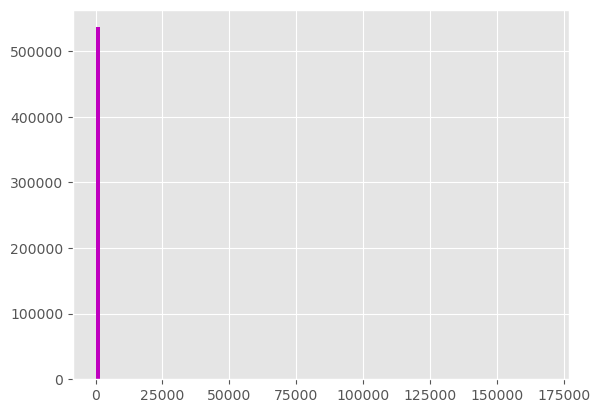

In [207]:
plt.hist(df['Sales'], bins=100, color= 'm')
#We cannot see clearly, the distribution of sales, becasue of the outliers that skewd the distribution to the right ~ 0

Text(0.5, 1.0, 'Outliers in Sales')

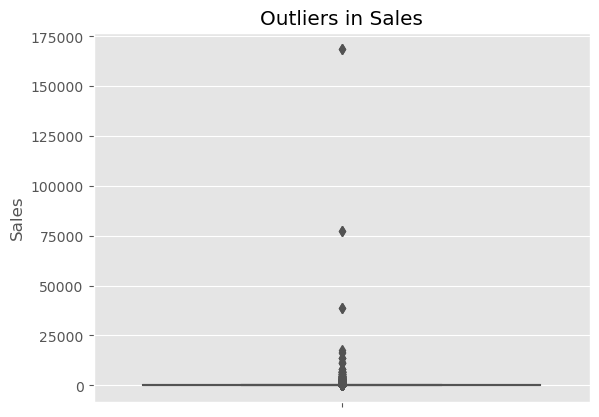

In [151]:
sns.boxplot(data = df,
            y = df['Sales']
           )
plt.title('Outliers in Sales')


- There are outliers that might interfear with the data analysis
- Find and exclude those variables

In [170]:
# Select all numeric limits to a (float), b (int) and e (timedelta)
#cols = df.select_dtypes('number').columns  
#df_sub = df.loc[:, cols]
#df_sub = df.drop(columns=['Year',
#                              'Month', 
#                              'Day',
#                              'Weekday',
#                              'CustomerID'])
#df_sub

#### **Z-Score**
The problem here is that the value in question distorts our measures mean and std heavily, resulting in inconspicious z-scores of roughly [-0.5, -0.5, -0.5, -0.5, 2.0], keeping every value within two standard deviations of the mean. One very large outlier might hence distort your whole assessment of outliers. I would discourage this approach.

#### **Quantile Filter**
A way more robust approach is given is this answer, eliminating the bottom and top 1% of data. However, this eliminates a fixed fraction independant of the question if these data are really outliers. You might loose a lot of valid data, and on the other hand still keep some outliers if you have more than 1% or 2% of your data as outliers.

#### **IQR-distance from Median**
Even more robust version of the quantile principle: Eliminate all data that is more than f times the interquartile range away from the median of the data. That's also the transformation that sklearn's RobustScaler uses for example. IQR and median are robust to outliers, so you outsmart the problems of the z-score approach.

In a normal distribution, we have roughly iqr=1.35*s, so you would translate z=3 of a z-score filter to f=2.22 of an iqr-filter. This will drop the 999 in the above example.

The basic assumption is that at least the "middle half" of your data is valid and resembles the distribution well, whereas you also mess up if your distribution has wide tails and a narrow q_25% to q_75% interval.

#### **Advanced Statistical Methods**
Of course there are fancy mathematical methods like the Peirce criterion, Grubb's test or Dixon's Q-test just to mention a few that are also suitable for non-normally distributed data. None of them are easily implemented and hence not addressed further.



In [156]:
from scipy.stats import zscore

In [185]:
#Create a function to remove outliers than devients more than 3 standard deviations from the mean
def remove_outliers_zscore(dataframe,columns, threshold=2):
    
    # Ensure columns is a list even if there's only one column
    if not isinstance(columns, list):
        columns = [columns]
        
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = dataframe.copy()
        
    #Remove outliers that exid the 3 sdt
    for column in columns:
        z_scores = np.abs(zscore(dataframe[column]))
        df_cleaned = df_cleaned[(z_scores < threshold)]

    return df_cleaned



In [186]:
# Apply the above function to remove outliers from Sales column
cleaned_df = remove_outliers_zscore(df, columns=['Sales', 
                                                 'UnitPrice',
                                                 'Quantity'])
cleaned_df

/var/folders/f_/s_7jgq1x1j14wsyfmg57w6c80000gn/T/ipykernel_17944/1100051557.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(z_scores < threshold)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Day,Weekday,Dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12,9,4,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12,9,4,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,9,4,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,9,4,Friday


In [187]:
df.shape

(536641, 14)

In [188]:
cleaned_df.shape

(535095, 14)

Text(0.5, 1.0, 'Outliers in Sales')

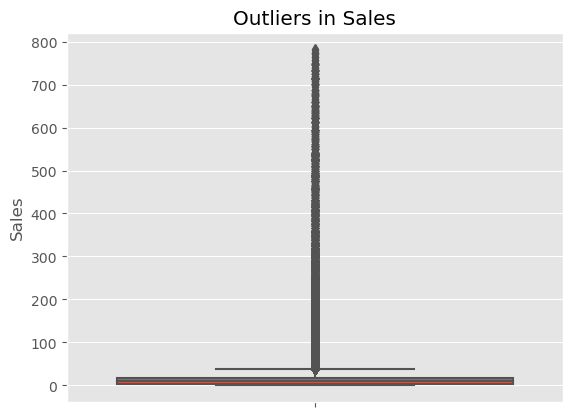

In [206]:
sns.boxplot(data = cleaned_df,
            y = cleaned_df['Sales']
           )
plt.title('Outliers in Sales')

- It seems that z-score approach did not remove all necessary outliers

- In the dataset we have a highly skewed distribution, the mean and standard deviation may be influenced by extreme values. In such cases, the z-score method might not effectively capture all outliers.

In [198]:
# Let's try to remove otliers using quantile filters
def remove_outliers_quantile(dataframe, columns, lower_quantile=0.01, upper_quantile=0.99):
    # Ensure columns is a list even if there's only one column
    if not isinstance(columns, list):
        columns = [columns]

    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned2 = dataframe.copy()

    for column in columns:
        lower_bound = df_cleaned2[column].quantile(lower_quantile)
        upper_bound = df_cleaned2[column].quantile(upper_quantile)
        df_cleaned2 = df_cleaned2[(df_cleaned2[column] >= lower_bound) & (df_cleaned2[column] <= upper_bound)]

    return df_cleaned2



In [199]:
# Example usage:
cleaned_df2 = remove_outliers_quantile(df, columns=['Sales'])
cleaned_df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Day,Weekday,Dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12,9,4,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12,9,4,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,9,4,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,9,4,Friday


In [201]:
df.shape

(536641, 14)

In [200]:
cleaned_df2.shape

(527049, 14)

In [202]:
536641-527049

9592

In [203]:
9592/536641

0.017874146775963818

Text(0.5, 1.0, 'Outliers in Sales')

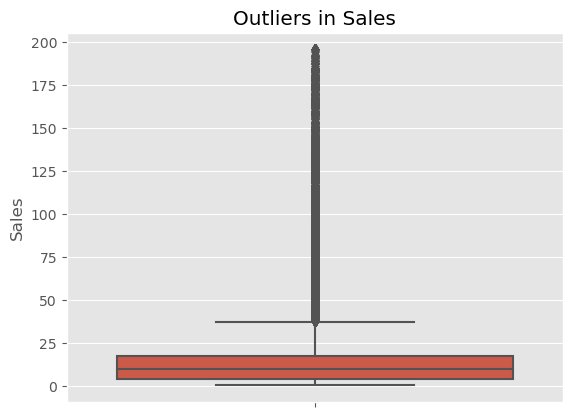

In [205]:
sns.boxplot(data = cleaned_df2,
            y = cleaned_df2['Sales']
           )
plt.title('Outliers in Sales')

- We removed 9592 outliers that is the 0.0187 % of the data
- Although we have outliers, we removed the more extreme values below 0.01 and 0.99 quantiles and it seems to have a better distribution

(array([6.8600e+04, 8.5162e+04, 4.8418e+04, 3.0981e+04, 4.2825e+04,
        2.6713e+04, 2.3904e+04, 4.1940e+04, 4.0414e+04, 2.0110e+04,
        1.3506e+04, 8.0220e+03, 1.1625e+04, 2.2830e+03, 1.6940e+03,
        1.0667e+04, 3.9950e+03, 5.2230e+03, 1.9900e+03, 1.0380e+03,
        4.3410e+03, 1.8320e+03, 1.8110e+03, 9.8000e+02, 6.5700e+02,
        3.3580e+03, 7.3600e+02, 6.6000e+02, 2.6500e+02, 3.6100e+02,
        2.0940e+03, 1.1510e+03, 3.5800e+02, 6.0000e+02, 1.1570e+03,
        9.7200e+02, 1.3280e+03, 1.6000e+02, 1.4020e+03, 1.2100e+02,
        5.7000e+02, 9.4900e+02, 5.0200e+02, 2.1100e+02, 2.0700e+02,
        9.2300e+02, 3.3500e+02, 2.4100e+02, 1.8100e+02, 1.4700e+02,
        5.4400e+02, 4.2800e+02, 1.0710e+03, 3.0600e+02, 1.9700e+02,
        1.1900e+02, 7.3000e+01, 7.8000e+01, 1.0300e+02, 7.1000e+01,
        2.6000e+02, 3.0000e+02, 4.1600e+02, 1.3700e+02, 1.3900e+02,
        1.5100e+02, 5.9000e+01, 1.3700e+02, 2.3000e+02, 1.3200e+02,
        9.4000e+01, 2.8600e+02, 1.2500e+02, 1.23

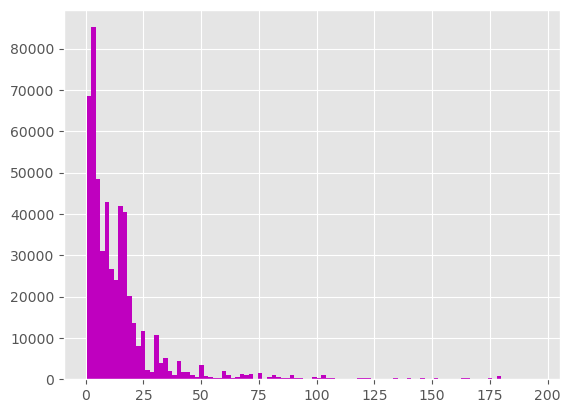

In [208]:
#Distribution of Cleaned 2 df
plt.hist(cleaned_df2['Sales'], bins=100, color= 'm')


In [209]:
cleaned_df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Day,Weekday,Dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday


#### Which country has the most sales transactions?

In [210]:
cleaned_df2['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Austria', 'Israel',
       'Finland', 'Sweden', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

- We don't have douplicate names, or same countries as different inputs. We are god to go!

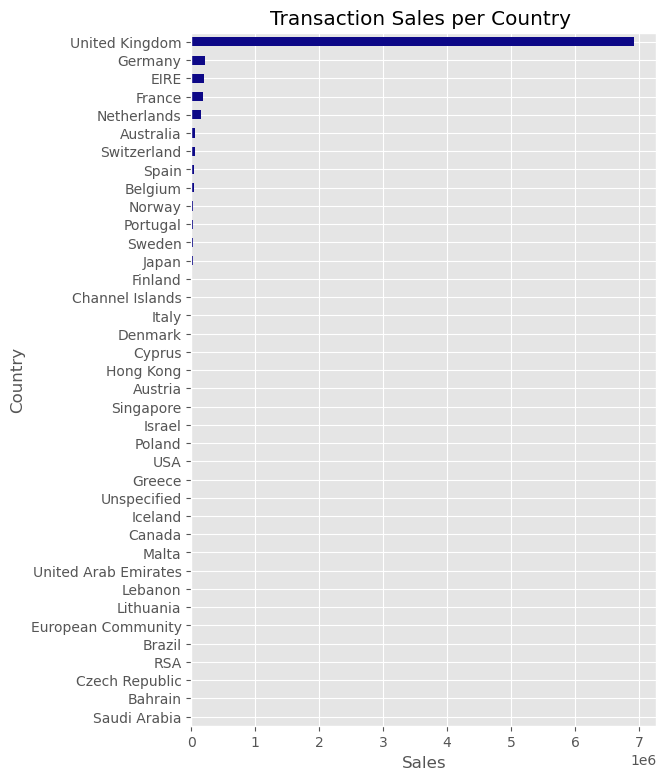

In [222]:
sales_country = cleaned_df2.groupby(by=["Country"])['Sales']\
                           .sum()\
                           .sort_values(ascending=True)\
                           .plot(kind='barh',
                                 colormap= 'plasma',
                                 title= 'Transaction Sales per Country ',
                                 xlabel=  'Sales',
                                 figsize= (6,9))

Show all countries apart UK which is clearly by far the country with the most sales. 
- So we can see the differences between the rest of the contries

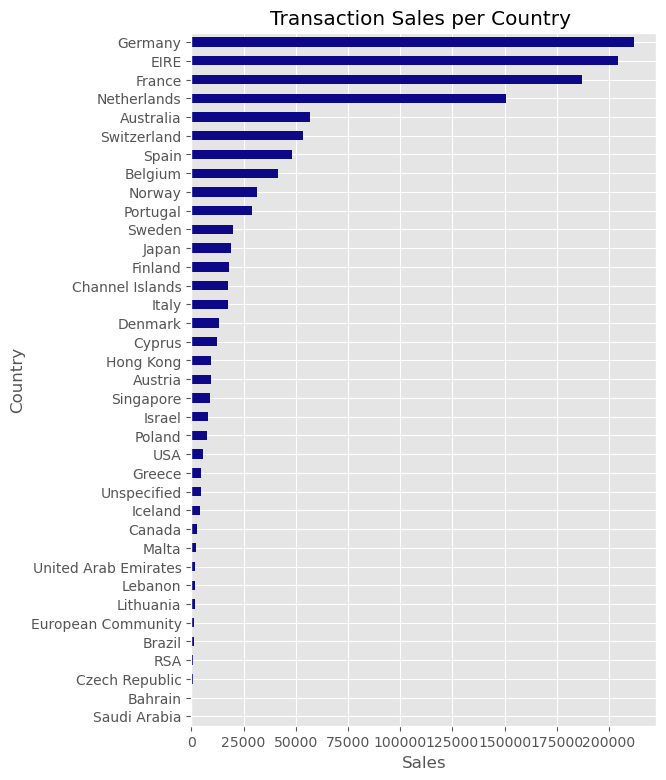

In [228]:
sales_country_top10 = cleaned_df2.groupby(by=["Country"])['Sales']\
                           .sum()\
                           .sort_values(ascending=True).head(37)\
                           .plot(kind='barh',
                                 colormap= 'plasma',
                                 title= 'Transaction Sales per Country ',
                                 xlabel=  'Sales',
                                 figsize= (6,9))

- UK is the Top country on sales 
- Germany, EIRE, France and netherlands come next 
- Saudi Arabia, and Bahrain are at the bottom with the least sales

#### Which year had the most sales?


In [229]:
cleaned_df2['Year'].unique()

array([2010, 2011])

- In this database we have only transcactions from 2010 and 2011
- Compare the transcactions between the 2 years and show the flactuations /month

In [259]:
yearly_transactions= cleaned_df2.groupby(['Month', 'Year'])['Sales'].sum().reset_index()
yearly_transactions

                        
                              
                              

,Month,Year,Sales
0,1,2011,497420.28
1,2,2011,432780.76
2,3,2011,563257.77
3,4,2011,445313.66
4,5,2011,616066.51
5,6,2011,570116.37
6,7,2011,561259.27
7,8,2011,579497.32
8,9,2011,825406.38
9,10,2011,891717.44


- Since we have only data for Dec in 2010, WE CAN EXCLUDE 2010 and find the transaction for 2011

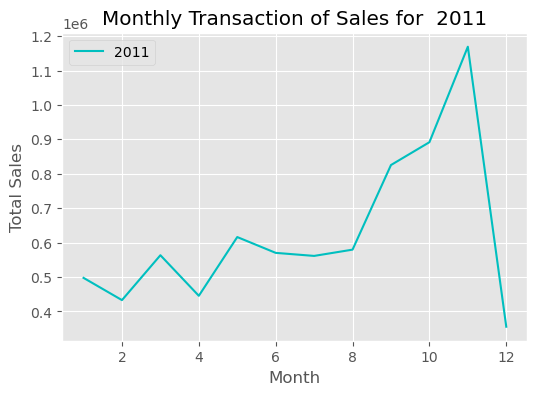

In [261]:
plt.figure(figsize=(6, 4))

colors=['m', 'c']

# Plotting with seaborn, creating separate lines for each year
#sns.lineplot(x='Month', y='Sales', data=yearly_transactions[yearly_transactions['Year'] == 2010], label='2010', color='m')
sns.lineplot(x='Month', y='Sales', data=yearly_transactions[yearly_transactions['Year'] == 2011], label='2011', color='c')


plt.title('Monthly Transaction of Sales for  2011')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


- There are flacuations of the total sales from January to August.
- From August and onword, sale transaction are climbing 
- November is the month with the most Sales (assumption: prob due to the black Friday and cyber Monday)

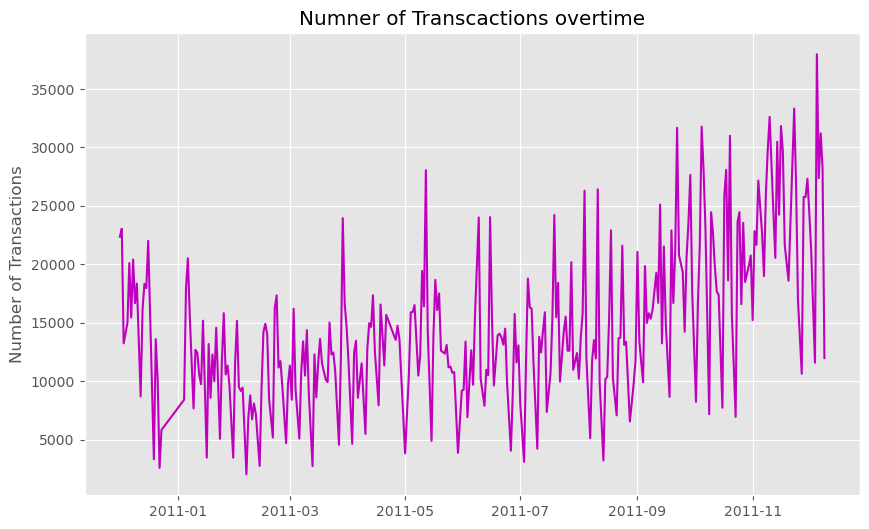

In [321]:
# Number of transactions over time - in another graph
plt.figure(figsize=(10, 6))
cleaned_df2.groupby(cleaned_df2["InvoiceDate"].dt.date)["Quantity"].sum().plot(color = 'm')
plt.title("Numner of Transcactions overtime")
plt.xlabel("")
plt.ylabel("Number of Transactions")
plt.show()

#### Which days have the most sales?

In [263]:
cleaned_df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales', 'Year', 'Month', 'Day',
       'Weekday', 'Dayofweek'],
      dtype='object')

In [269]:
cleaned_df2['Weekday'].unique()
# no recorded purchases during Saturday

array([2, 3, 4, 6, 0, 1])

/var/folders/f_/s_7jgq1x1j14wsyfmg57w6c80000gn/T/ipykernel_17944/3274174732.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Day_sales = cleaned_df2.groupby(by=['Dayofweek']).sum()\


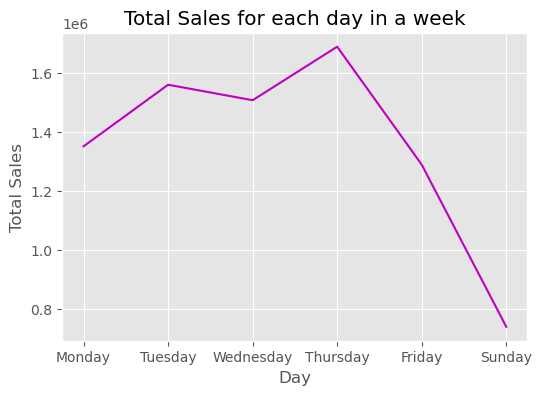

In [267]:
Day_sales = cleaned_df2.groupby(by=['Dayofweek']).sum()\
              .sort_values('Weekday',ascending=True)['Sales']\
              .plot(kind='line',figsize=(6,4),
                    title= 'Total Sales for each day in a week',
                    xlabel = 'Day',
                    ylabel = 'Total Sales',
                    color = 'm'
                    )


plt.show()

/var/folders/f_/s_7jgq1x1j14wsyfmg57w6c80000gn/T/ipykernel_17944/2592353411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Day_sales = cleaned_df2.groupby(by=['Dayofweek']).sum()\


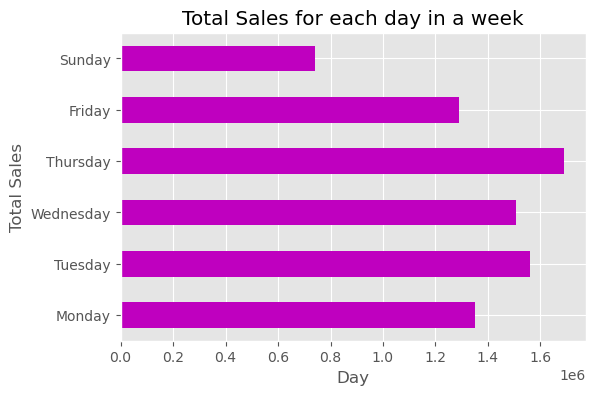

In [324]:
Day_sales = cleaned_df2.groupby(by=['Dayofweek']).sum()\
              .sort_values('Weekday',ascending=True)['Sales']\
              .plot(kind='barh',figsize=(6,4),
                    title= 'Total Sales for each day in a week',
                    xlabel = 'Day',
                    ylabel = 'Total Sales',
                    color = 'm'
                    )

- Thursay, following by Tuesday and Wednesday are the days with the most transactions

#### What are the top purchased items?

In [275]:
cleaned_df2['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'SET 10 CARDS SWIRLY XMAS TREE 17104', 'LETTER "U" BLING KEY RING',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

/var/folders/f_/s_7jgq1x1j14wsyfmg57w6c80000gn/T/ipykernel_17944/1250597228.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_purchased_item = cleaned_df2.groupby('Description').sum()\


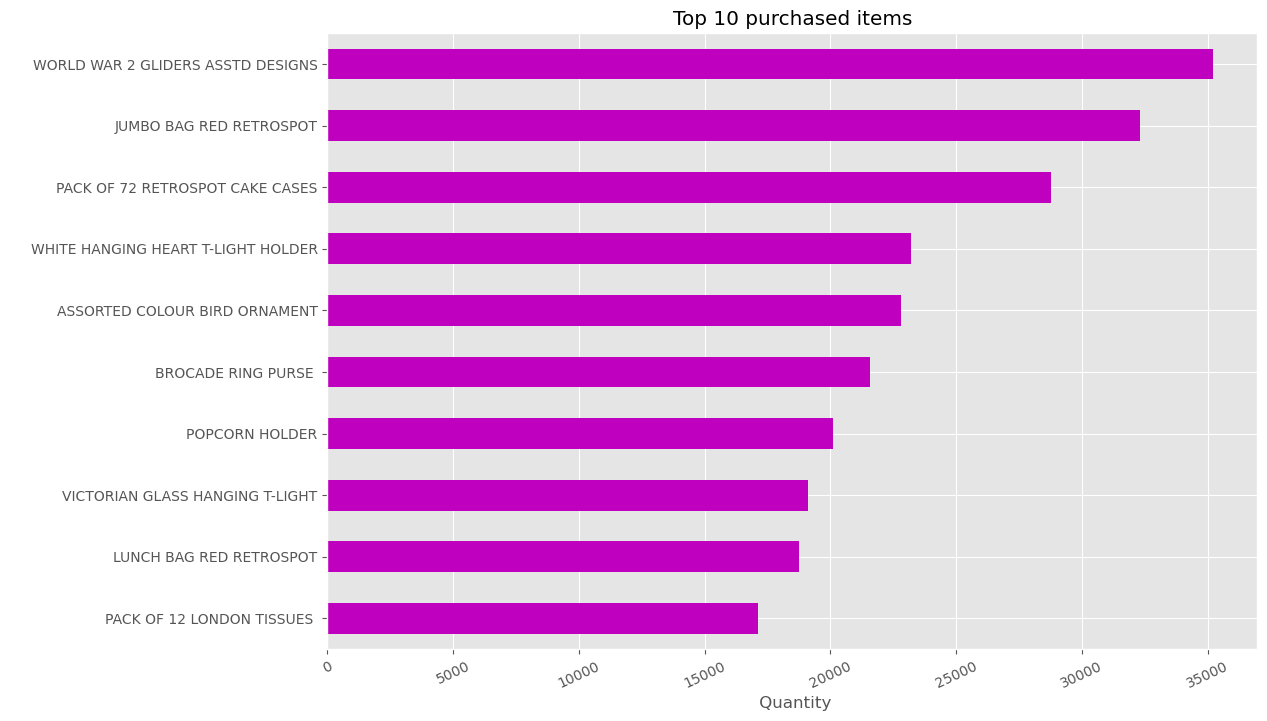

In [285]:
df_purchased_item = cleaned_df2.groupby('Description').sum()\
                               .sort_values('Quantity',ascending= True)\
                               .tail(10)
df_purchased_item['Quantity'].plot(kind = 'barh',
                                   figsize=(12,8),
                                   xlabel= ' Quantity',
                                   ylabel=" ",
                                   color = 'm',
                                   title= 'Top 10 purchased items')
plt.xticks(rotation=25)
plt.show()

- World War 2 glitter design and Jumbo bag red retrospot are the most purchased items

#### Top 10 item that have the most sales in each year

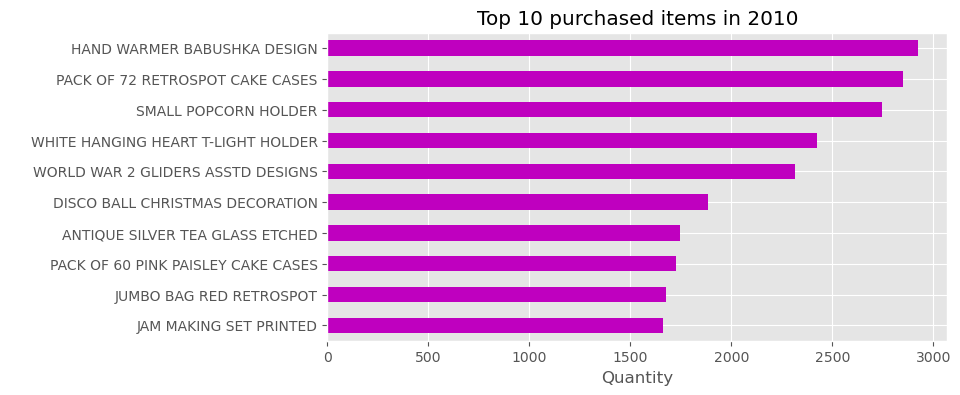

In [316]:


df_purchased_item_2010 = cleaned_df2[cleaned_df2['Year'] == 2010]\
                               .groupby('Description')['Quantity'].sum()\
                               .sort_values(ascending=True)\
                               .tail(10)

df_purchased_item_2010.plot(kind='barh',
                             figsize=(8, 4),
                             xlabel='Quantity',
                             ylabel=" ",
                             color='m',
                             title='Top 10 purchased items in 2010')


plt.show()
           


- Most Purchased items for Dec 2010 were 'Hand Warmer babushka design', 'pack of 72 retrospot' and 'small popcorn holder'

<Axes: title={'center': 'Top 10 purchased items in 2011'}, xlabel='Quantity', ylabel=' '>

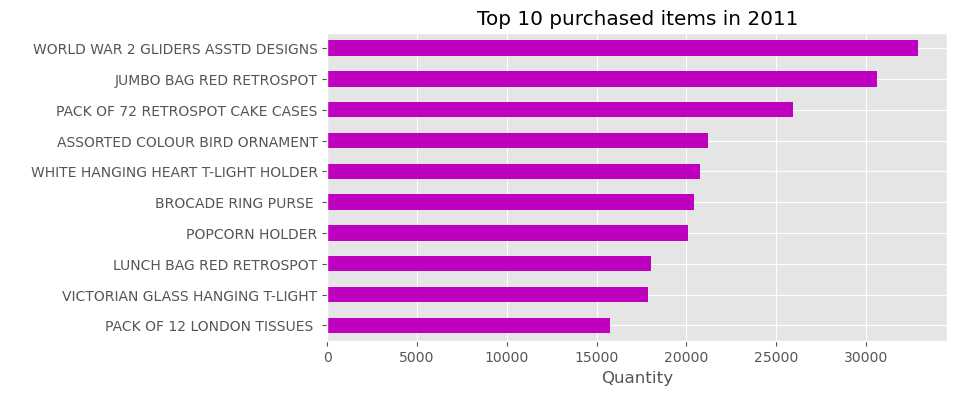

In [317]:
df_purchased_item_2011 = cleaned_df2[cleaned_df2['Year'] == 2011]\
                               .groupby('Description')['Quantity'].sum()\
                               .sort_values(ascending=True)\
                               .tail(10)

df_purchased_item_2011.plot(kind='barh',
                             figsize=(8, 4),
                             xlabel='Quantity',
                             ylabel=" ",
                             color='m',
                             title='Top 10 purchased items in 2011')


- Top 3 purchased items in 2011 'World war 2 gliders asstd designs', 'jumbo bag red retrospot' and 'Pack of 72 retrospot cake cases'